### **Exploratory Data Analysis: Time and Transaction Amounts**  

This notebook explores temporal patterns and transaction amounts in the credit card fraud dataset.  
The goal is to uncover how fraud differs from normal transactions across **time** and **amount**, providing insights for downstream modeling.  

---

#### Objectives  
1. **Time Analysis**  
   - Convert transaction time into hours of the day.  
   - Compare the frequency of fraud vs. normal transactions by hour.  
   - Identify peak hours for fraudulent activity.  

2. **Amount Analysis**  
   - Generate summary statistics of transaction amounts, grouped by class.  
   - Address skewness with a `log1p` transformation for visualization.  
   - Compare fraud vs. normal transactions using KDE plots and boxplots.  

---

#### Key Findings  

##### 1. Temporal Patterns  
- Fraudulent transactions **spike around 2 AM and 11 AM**, and remain consistently higher after 1 PM compared to the morning hours.  
- Normal transactions follow a **daily business cycle**, peaking during typical daytime hours.  
- This suggests fraudsters may exploit times of **lower oversight (late night)** or **higher transaction volume (midday)**.  

##### 2. Transaction Amounts  
- **Normal Transactions (Class = 0)**:  
  - Median = **22.00**, Mean = **88.29**, Max = **25,691.16**  
- **Fraudulent Transactions (Class = 1)**:  
  - Median = **9.25**, Mean = **122.21**, Max = **2,125.87**  

**Insights:**  
- Fraudulent transactions are **typically smaller** (lower median).  
- However, their **average amount is higher** due to fewer but large-value frauds.  
- Distributions are **highly skewed**, requiring log transformation for meaningful visualization.  
- KDE and boxplots show that fraud often occurs at **low amounts (to evade detection)** but can also appear as **large, high-impact frauds**.  

---

#### Outputs  
- Hourly fraud distribution saved as:  
  `../reports/figures/fraud_by_hour.png`  
- Amount distribution comparison saved as:  
  `../reports/figures/amount_distribution_comparison.png`  
and more

In [1]:
import pandas as pd 

In [2]:
df=pd.read_csv('/home/parthivkola/projects/Credit-Card-Fraud-Detection/data/raw/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.shape

(284807, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [8]:
X = df.drop(columns=['Class'])  # features
y = df['Class']  # target

In [9]:
df['Hour'] = (df['Time'] // 3600) % 24
df['Hour']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
284802    23.0
284803    23.0
284804    23.0
284805    23.0
284806    23.0
Name: Hour, Length: 284807, dtype: float64

In [10]:
import numpy as np

df['LogAmount'] = np.log1p(df['Amount'])

df = df.drop(columns=['Time'])


In [11]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,LogAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,4.262539


In [12]:
df.tail()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,LogAmount
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,23.0,0.570980
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,23.0,3.249987
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,23.0,4.232366
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,23.0,2.397895
284806,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,-0.915427,...,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0,23.0,5.384495


In [13]:
print(df['Class'].value_counts())
print(df['Class'].value_counts(normalize=True))  # gives percentages

Class
0    284315
1       492
Name: count, dtype: int64
Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


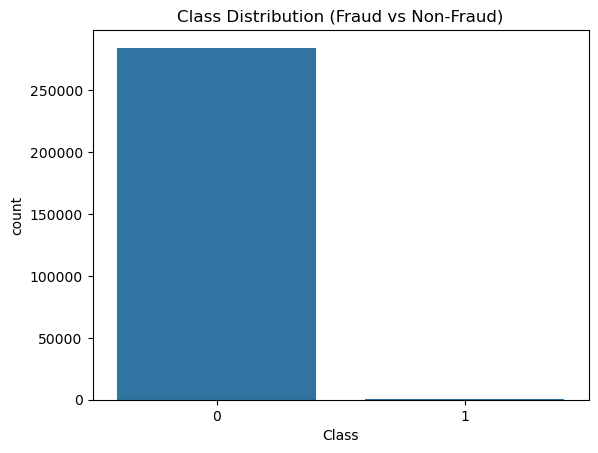

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Class', data=df)
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()


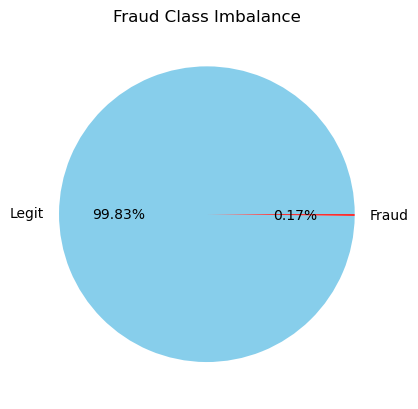

In [15]:
df['Class'].value_counts().plot.pie(
    autopct='%1.2f%%', labels=['Legit', 'Fraud'], colors=['skyblue','red']
)
plt.title("Fraud Class Imbalance")
plt.ylabel("")
plt.show()


### Class Imbalance in the Dataset  

The dataset exhibits a **severe class imbalance**:  

- As shown in the bar and pie charts, the vast majority of transactions are **normal (≈99.83%)**, while only **≈0.17% are fraudulent**.  
- This imbalance poses a significant challenge for modeling, as standard classifiers may become biased toward predicting the majority class.  

Addressing this imbalance (e.g., via resampling, class weighting, or anomaly detection methods) is a critical step in building an effective fraud detection system.  

In [16]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

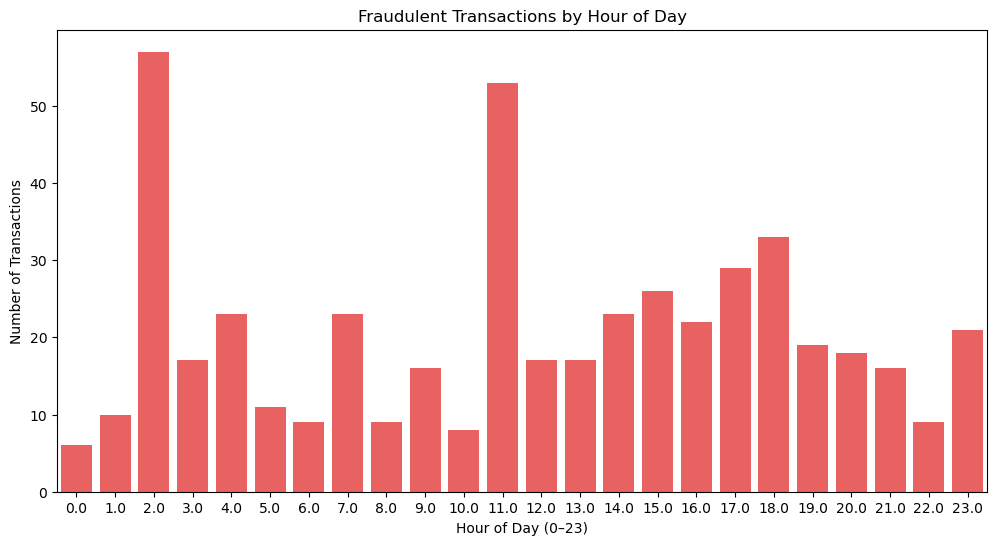

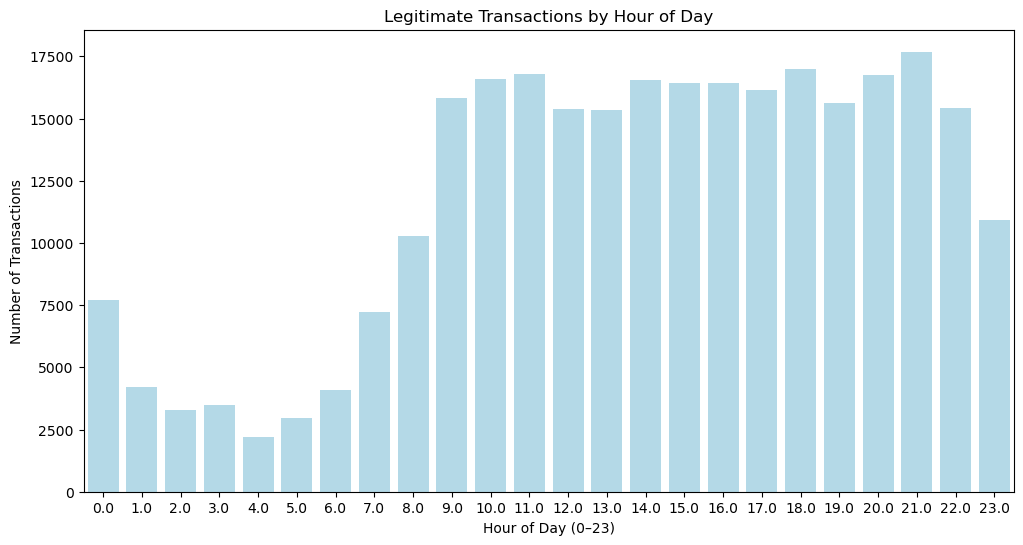

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fraudulent transactions
plt.figure(figsize=(12,6))
sns.countplot(x="Hour", data=fraud, color="red", alpha=0.7)
plt.title("Fraudulent Transactions by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Transactions")
plt.savefig("../reports/figures/fraud_by_hour.png", bbox_inches='tight')
plt.show()

# Normal transactions
plt.figure(figsize=(12,6))
sns.countplot(x="Hour", data=normal, color="skyblue", alpha=0.7)
plt.title("Legitimate Transactions by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Transactions")
plt.savefig("../reports/figures/legitimate_by_hour.png", bbox_inches='tight')
plt.show()


### Key Insight: Fraudulent Transactions by Hour of Day  

From the graph below, we observe distinct temporal patterns in fraudulent activity:  

- **Fraud spikes around 2 AM and 11 AM**, which may correspond to periods of reduced oversight or shifts in monitoring.  
- After **1 PM**, the fraud rate remains higher than in the early morning hours, suggesting sustained risk during afternoon and evening transactions.  

These insights highlight the importance of incorporating **time-of-day features** when modeling fraud detection systems.  

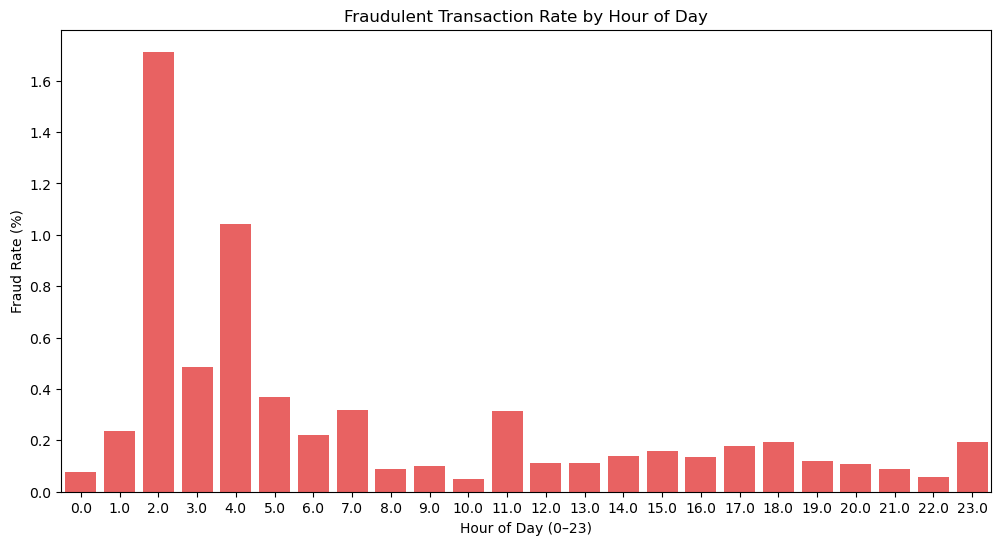

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Compute fraud rate per hour
hourly_counts = df.groupby('Hour')['Class'].value_counts().unstack().fillna(0)
hourly_counts['FraudRate'] = hourly_counts[1] / (hourly_counts[0] + hourly_counts[1]) * 100

plt.figure(figsize=(12,6))
sns.barplot(x=hourly_counts.index, y=hourly_counts['FraudRate'], color="red", alpha=0.7)
plt.title("Fraudulent Transaction Rate by Hour of Day")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Fraud Rate (%)")
plt.savefig("../reports/figures/fraud_rate_by_hour.png", bbox_inches='tight')
plt.show()


The plot visualizes the **fraudulent transaction rate** as a percentage, broken down by **hour of the day (0-23)**.

#### Key Observations:
- The **highest fraud rate** occurs at **2 AM**, reaching approximately **1.7%**.
- Another significant peak is seen at **4 AM**, around **1%**.
- Fraud rates are relatively low during daytime hours (9 AM - 6 PM), mostly below **0.2%**.
- There is a slight increase again around **11 PM (23:00)**.


In [19]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V23,V24,V25,V26,V27,V28,Amount,Class,Hour,LogAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,5.014760
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,1.305626
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,0.0,5.939276
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.0,4.824306
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,0.0,4.262539


In [20]:
summary_stats = df.groupby("Class")["Amount"].describe()
print("Summary statistics for Amount by Class:")
print(summary_stats)

Summary statistics for Amount by Class:
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


### Summary Statistics of Transaction Amounts by Class  

From the descriptive statistics of the `Amount` feature:  

- **Normal transactions (Class = 0)**  
  - Median = **22.00**, mean = **88.29**  
  - 75% of transactions are below **77.05**  
  - Maximum = **25,691.16**, showing some very large outliers.  

- **Fraudulent transactions (Class = 1)**  
  - Median = **9.25**, mean = **122.21**  
  - 75% of transactions are below **105.89**  
  - Maximum = **2,125.87**, smaller than the extreme max for normal transactions.  

🔑 **Key Observations:**  
- Fraudulent transactions are **typically smaller** in value (lower median).  
- However, the **average fraud amount is higher** than normal (due to fewer but large frauds).  
- This highlights that fraud can occur both in **small amounts (to fly under the radar)** and in **larger amounts (potential high-impact frauds)**.  
- The extreme skewness of both distributions justifies the use of a **log transformation** for clearer visualization.  


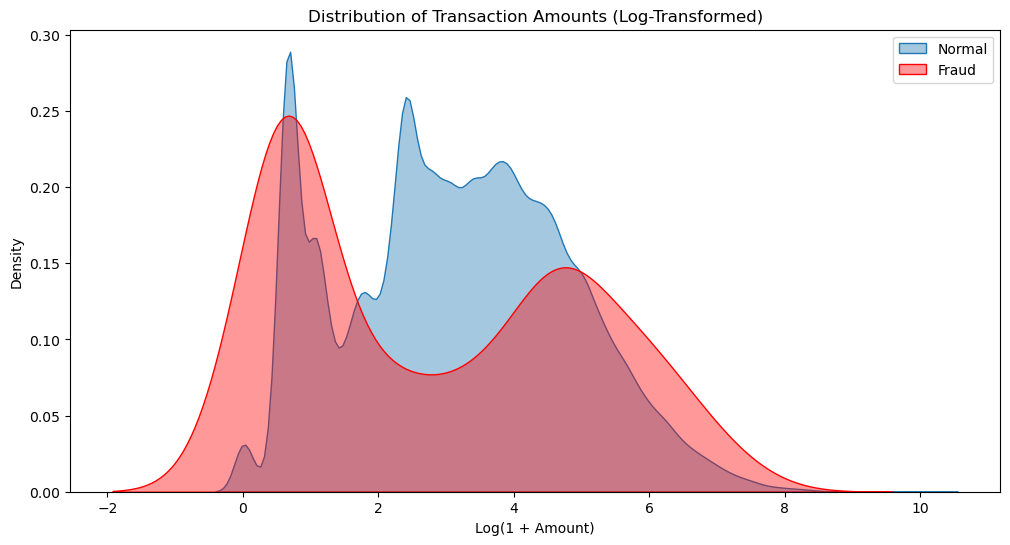

/tmp/ipykernel_11355/3809920335.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="Class", y="LogAmount", palette=["skyblue","red"])


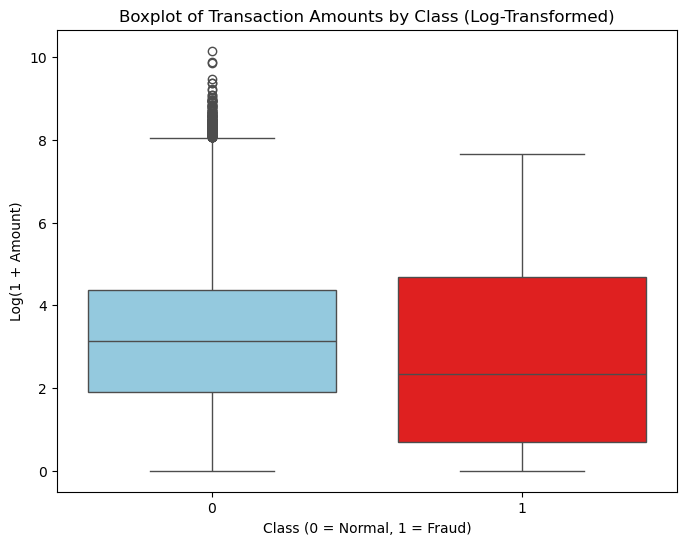

In [21]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=df[df["Class"] == 0], x="LogAmount", fill=True, label="Normal", alpha=0.4)
sns.kdeplot(data=df[df["Class"] == 1], x="LogAmount", fill=True, label="Fraud", alpha=0.4, color="red")
plt.title("Distribution of Transaction Amounts (Log-Transformed)")
plt.xlabel("Log(1 + Amount)")
plt.ylabel("Density")
plt.legend()
plt.savefig("../reports/figures/amount_distribution_comparison.png", bbox_inches="tight")
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(data=df, x="Class", y="LogAmount", palette=["skyblue","red"])
plt.title("Boxplot of Transaction Amounts by Class (Log-Transformed)")
plt.xlabel("Class (0 = Normal, 1 = Fraud)")
plt.ylabel("Log(1 + Amount)")
plt.savefig("../reports/figures/boxplot_amount_distribution_comparison.png", bbox_inches="tight")
plt.show()

### Transaction Amounts: Normal vs. Fraud  

1. **Summary Statistics**  
   - Fraudulent transactions generally have **lower median amounts** compared to normal ones.  
   - The distribution of amounts is **highly skewed**, with a few very large values.  

2. **Log-Transformation**  
   - To address skewness, a `log1p` transformation was applied (`Log(1 + Amount)`), allowing clearer comparison between the two classes.  

3. **Insights from Visualizations**  
   - **KDE Plot**: Fraudulent transactions are concentrated at **lower amounts**, though there is also a noticeable tail of larger frauds.  
   - **Boxplot**: Fraudulent transactions show a **lower median** and wider spread compared to normal transactions.  

🔑 **Key Takeaway:**  
Fraudulent transactions are **typically smaller in amount**, likely to avoid detection, but occasional **large frauds** also occur.  

The key comparative visualization has been saved to:  
`reports/figures/amount_distribution_comparison.png`  
